# Punto 1
Haga una análisis descriptivo de la serie de tiempo, es decir, haga la gráfica de la serie, gráfica de la función de autocorrelaci´on hasta 20 rezagos. Qué características puede usted observar al respecto? Es decir, es estacionaria o no estacionaria? Por qu´e? Hay estructura de autocorrelación presente en los datos?(2 puntos)
## Cargar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

In [2]:
data = pd.ExcelFile('Serie de Ejercicios.xlsx')
print(data.sheet_names)

['Desocupados en miles', 'IPP', 'ISE', 'Colcap', 'PIB', 'Demanda Energía California']


In [3]:
df = data.parse('Colcap')

print(df)
type(df)

         Fecha  Apertura
0   2021-04-13   1317.76
1   2021-04-12   1322.11
2   2021-04-09   1325.93
3   2021-04-08   1335.89
4   2021-04-07   1324.35
..         ...       ...
764 2018-02-20   1515.70
765 2018-02-19   1520.71
766 2018-02-16   1514.36
767 2018-02-15   1518.78
768 2018-02-14   1504.98

[769 rows x 2 columns]


pandas.core.frame.DataFrame

## Preprocesamiento

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha']) ###Sólo es necesario si no tiene formato de fecha, entonces se transforma
df = df.sort_values(['Fecha'])

print(df)

         Fecha  Apertura
768 2018-02-14   1504.98
767 2018-02-15   1518.78
766 2018-02-16   1514.36
765 2018-02-19   1520.71
764 2018-02-20   1515.70
..         ...       ...
4   2021-04-07   1324.35
3   2021-04-08   1335.89
2   2021-04-09   1325.93
1   2021-04-12   1322.11
0   2021-04-13   1317.76

[769 rows x 2 columns]


In [5]:
Aper = df.set_index('Fecha')  #establecer la columna Fecha como indice
print(type(Aper))  ### no ha cambiado el tipo, solo cambio su indice 
#ColCap

COLts=Aper['Apertura']  ##inmediatamente es un objeto de series de tiempo 
print(type(COLts))
print(COLts)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Fecha
2018-02-14    1504.98
2018-02-15    1518.78
2018-02-16    1514.36
2018-02-19    1520.71
2018-02-20    1515.70
               ...   
2021-04-07    1324.35
2021-04-08    1335.89
2021-04-09    1325.93
2021-04-12    1322.11
2021-04-13    1317.76
Name: Apertura, Length: 769, dtype: float64


## Grafico de la serie
La serie presenta tendencia porque al parecer la media cambia  a lo largo del tiempo, no es muy claro los ciclos cuanto duran pero a lo largo de un año vemos varios valles y picos. Por el comportamiento de la serie no es muy clara la varianza marginal, parece que es constante.

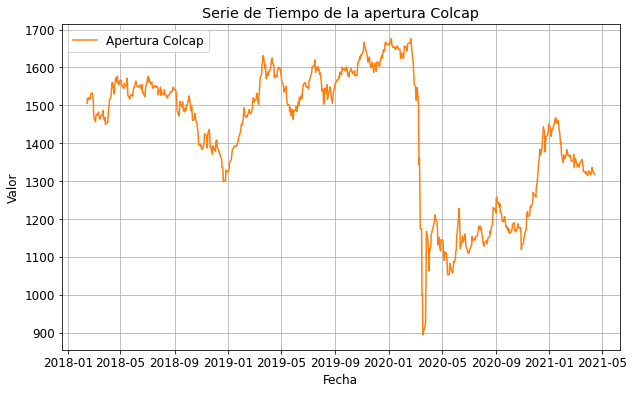

In [7]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(COLts, color='tab:orange', label='Apertura Colcap')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Serie de Tiempo de la apertura Colcap')
ax.grid(True)
ax.legend(loc='upper left');

La estructura de correlación es muy fuerte en los datos, no es estacionaria.

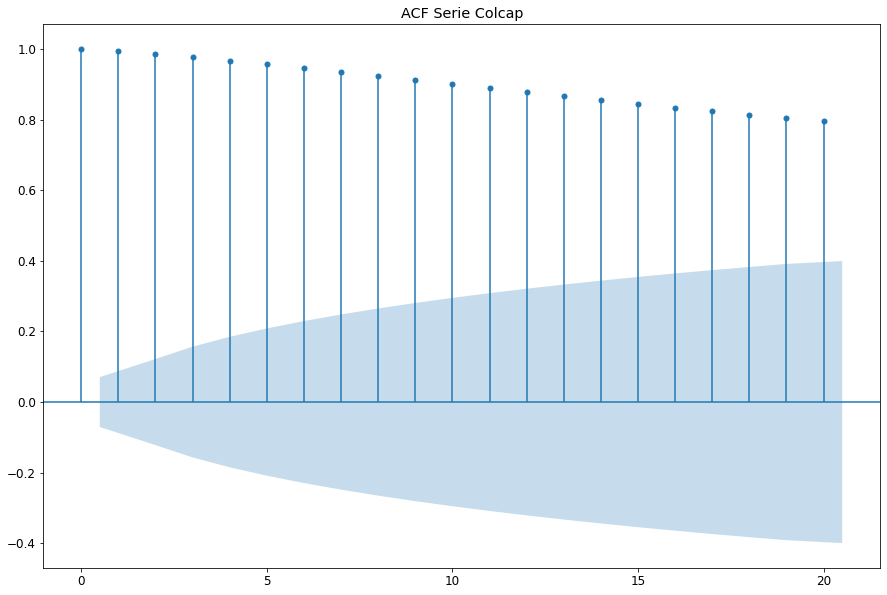

In [8]:
a=plot_acf(COLts,adjusted=False,lags=20,title='ACF Serie Colcap')

# Punto 2
La serie de tiempo requiere de una transformaci´on del tipo Box-Cox? De sugerir el uso de transformaci´on, use el valor de λ que nos arroja Python. Explique(2 puntos)

In [9]:
import scipy as sp
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
data1 = df
print(sp.stats.boxcox(data1['Apertura'],alpha=0.05))

(array([5.27658619e+12, 5.48279987e+12, 5.41609531e+12, 5.51212205e+12,
       5.43625228e+12, 5.46175556e+12, 5.58141491e+12, 5.68916897e+12,
       5.69540952e+12, 5.57619121e+12, 5.44876619e+12, 4.89512609e+12,
       4.72971640e+12, 4.59703560e+12, 4.77799748e+12, 4.85630367e+12,
       4.83188366e+12, 4.83946175e+12, 4.94777071e+12, 4.90277963e+12,
       4.74762518e+12, 4.69593935e+12, 4.74246434e+12, 4.85934548e+12,
       4.87513086e+12, 5.00310766e+12, 4.75904855e+12, 4.63266962e+12,
       4.76722091e+12, 4.51304565e+12, 4.58564518e+12, 4.79234950e+12,
       5.10011200e+12, 5.16861647e+12, 5.42330916e+12, 5.51288327e+12,
       5.68168718e+12, 5.93982527e+12, 6.13678194e+12, 6.06752731e+12,
       5.78711695e+12, 5.65493899e+12, 6.00699273e+12, 6.17121947e+12,
       6.34375730e+12, 6.15944784e+12, 6.41522718e+12, 6.17769286e+12,
       6.10331362e+12, 6.02619618e+12, 6.24271173e+12, 6.22782840e+12,
       6.22966644e+12, 6.02114668e+12, 5.92420874e+12, 5.87962534e+12,
     

La transformación sugerida es de 4.19, es claro que no es necesaria. Pero hagamosla pa ver

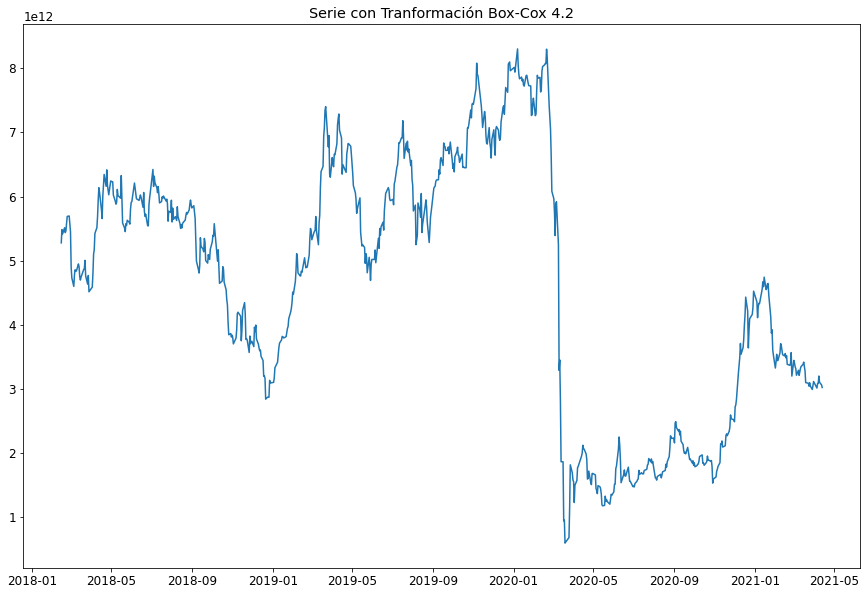

In [10]:
tCOL =sp.stats.boxcox(data1['Apertura'], lmbda=4.2)
trans = data1.assign(tCOL=tCOL)

tCOL1 = trans.set_index(df['Fecha'])
tCOLco = tCOL1['tCOL']
plt.plot(tCOLco)
plt.title('Serie con Tranformación Box-Cox 4.2')
plt.show()

Es igual, no es necesario.

# Punto 3
Con base en la acf muestral, proponga el n´umero de retardos de la variable producci´on de ca˜na de az´ucar que deber´ıa tener en cuenta como covariables (recuerde que s´olo debe tener en cuenta las primeras 20 autocorrelaciones muestrales) para el ajuste de un modelo de arboles de decisi´on o de redes neuronales. Explique.(2 puntos)

Teniendo en cuenta que el acf es

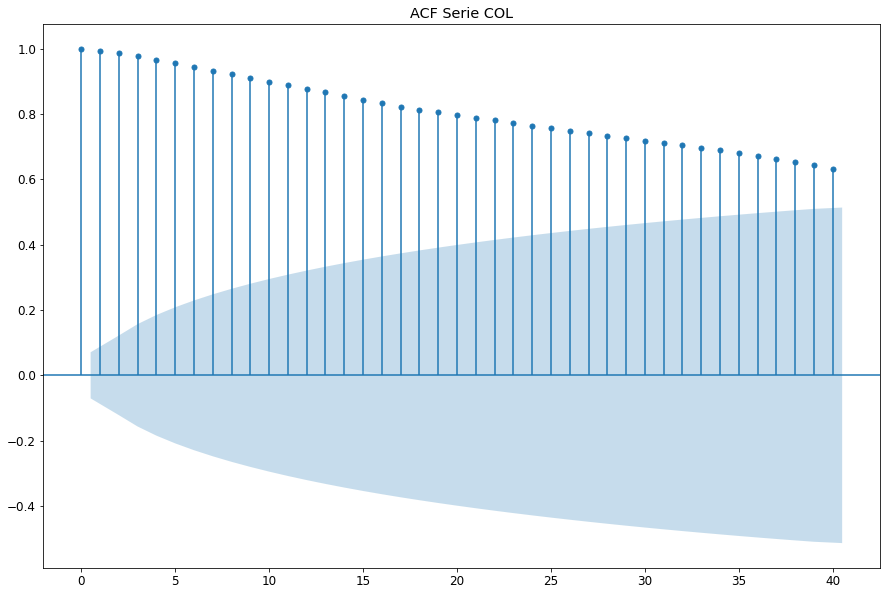

In [12]:
a=plot_acf(COLts,adjusted=False,lags=40,title='ACF Serie COL')

Esto no nos dice mucho, entonces haremos el acf diferenciado para ver si hay algo

In [6]:
dif_COLts=COLts.diff(periods=1)

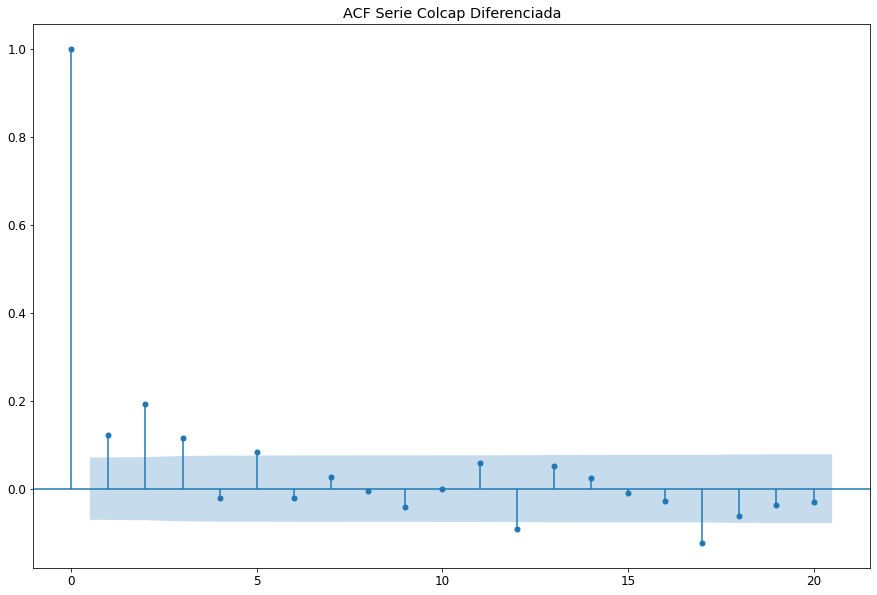

In [17]:
#a=plot_acf(ISEts,adjusted=False,lags=20,title='ACF Serie ISE')
b=plot_acf(dif_COLts.dropna(),adjusted=False,lags=20,title='ACF Serie Colcap Diferenciada')
#c=plot_acf(COLdetrend,adjusted=False,lags=20,title='ACF Serie Colcap sin Tendencia')

Utilizamos el periodograma

1
0.0013003901170351106


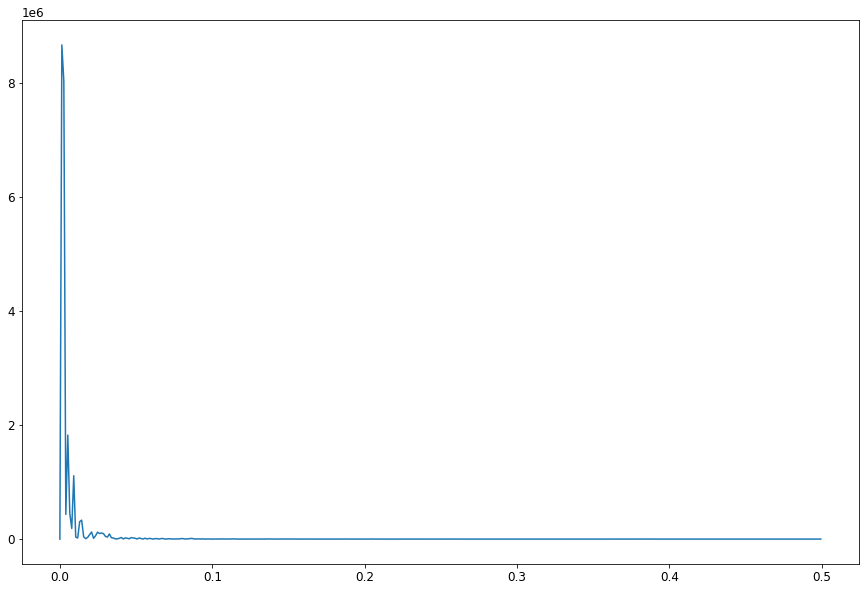

In [45]:
f, Pxx_den=sp.signal.periodogram(COLts)
plt.plot(f, Pxx_den)
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)

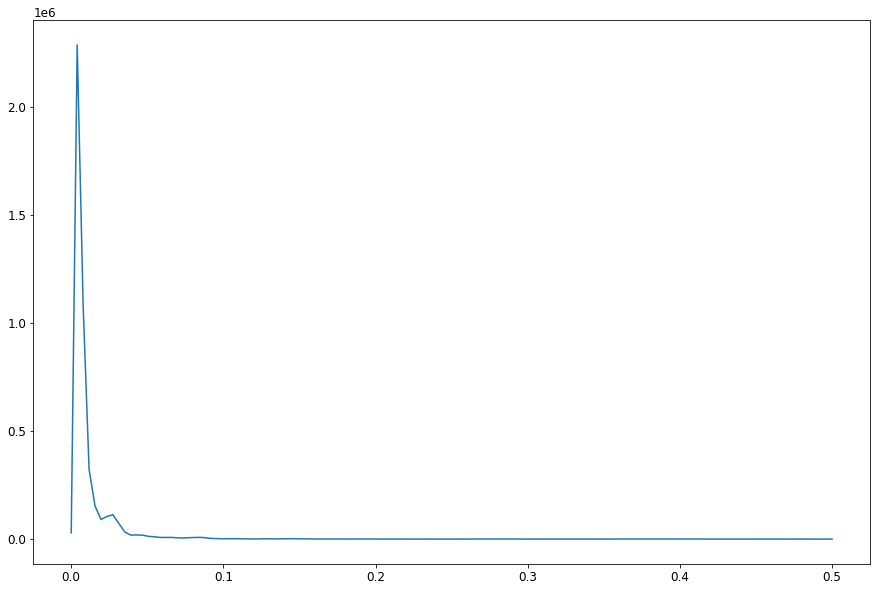

In [46]:
f_welch, Pxx_den_welch=sp.signal.welch(COLts)
plt.plot(f_welch, Pxx_den_welch)

Escogemos 5 retardos como covariables

# Punto 4
Ajuste 3 modelos para la serie de tiempo indicada (1 de Suavizamiento exponencial, 1 de arboles de decisi´on y 1 de Redes neuronales multicapa.)

## Suavizamiento Exponencial
Lo ajustamos de la siguiente manera, recuerde que no se debia hacer transformación de BoxCox entonces:

C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0, 0.5, 'resid')

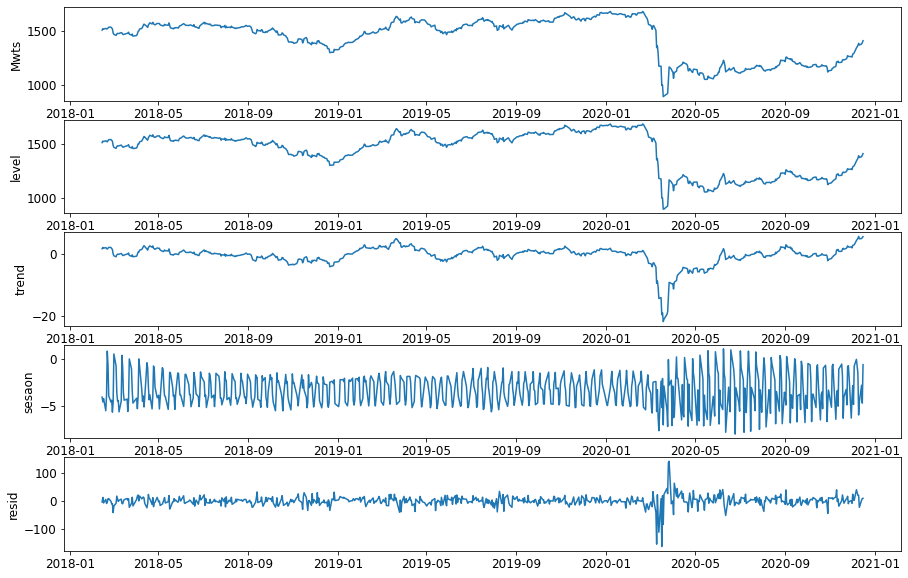

In [42]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #suavizamiento exponencial
#print(pd.infer_freq(data['Month'], warn=True))

trainCOL = COLts[0:692] # USAR EL TAMAÑO PARA VALIDAR DESPUES
fit1 = ExponentialSmoothing(trainCOL, seasonal_periods=7, trend='add', seasonal='add', initialization_method="estimated",use_boxcox=False).fit()
#metemos la serie, hacemos explicita la frecuencia de cada cuanto observa

####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(COLts[0:692])
plt.ylabel('Mwts')
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level')
plt.subplot(5, 1, 3)
plt.plot(fit1.trend)
plt.ylabel('trend')
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon')
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

In [41]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.962515,True
smoothing_trend,beta,0.029045,True
smoothing_seasonal,gamma,0.025592,True
initial_level,l.0,1513.842586,True
initial_trend,b.0,0.273833,True
initial_seasons.0,s.0,4.128144,True
initial_seasons.1,s.1,4.316320,True
initial_seasons.2,s.2,0.760424,True
initial_seasons.3,s.3,1.092809,True
initial_seasons.4,s.4,1.635182,True


## Arboles de decisión
Solución

Vamos a trabajar con la serie original ya que la tendencia no es muy marcada, sin embargo, en caso de no dar buenos resultados o como mejoramiento del modelo podemos refinarnos y trabajar con la serie sin tendencia o diferenciada. Veremos que sucede durante del desarrollo.

Preparamos las covariables

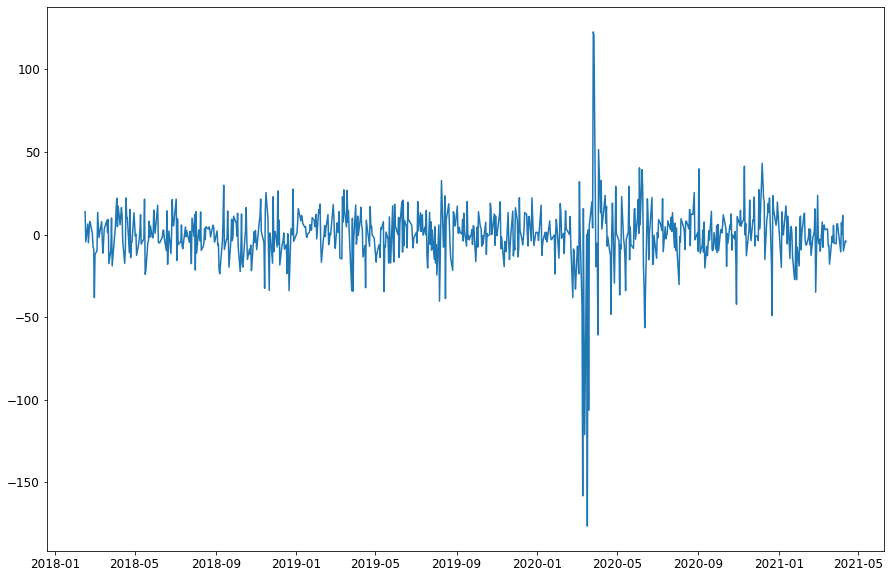

In [78]:
plt.plot(dif_COLts)

In [7]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [8]:
dCOLdf = pd.DataFrame(dif_COLts.values,index=dif_COLts.index)
type(dCOLdf)
print(dCOLdf)

                0
Fecha            
2018-02-14    NaN
2018-02-15  13.80
2018-02-16  -4.42
2018-02-19   6.35
2018-02-20  -5.01
...           ...
2021-04-07   0.38
2021-04-08  11.54
2021-04-09  -9.96
2021-04-12  -3.82
2021-04-13  -4.35

[769 rows x 1 columns]


In [9]:

for i in range(5,0,-1):
    df1[['t-'+str(i)]] = dCOLdf.shift(i)
    
print(df1)

              t-5    t-4    t-3    t-2    t-1
Fecha                                        
2018-02-14    NaN    NaN    NaN    NaN    NaN
2018-02-15    NaN    NaN    NaN    NaN    NaN
2018-02-16    NaN    NaN    NaN    NaN  13.80
2018-02-19    NaN    NaN    NaN  13.80  -4.42
2018-02-20    NaN    NaN  13.80  -4.42   6.35
...           ...    ...    ...    ...    ...
2021-04-07  -5.65   6.37   6.49 -10.51   7.16
2021-04-08   6.37   6.49 -10.51   7.16   0.38
2021-04-09   6.49 -10.51   7.16   0.38  11.54
2021-04-12 -10.51   7.16   0.38  11.54  -9.96
2021-04-13   7.16   0.38  11.54  -9.96  -3.82

[769 rows x 5 columns]


In [10]:

df1['t'] = dCOLdf.values
print(df1.head(13))

              t-5    t-4    t-3    t-2    t-1      t
Fecha                                               
2018-02-14    NaN    NaN    NaN    NaN    NaN    NaN
2018-02-15    NaN    NaN    NaN    NaN    NaN  13.80
2018-02-16    NaN    NaN    NaN    NaN  13.80  -4.42
2018-02-19    NaN    NaN    NaN  13.80  -4.42   6.35
2018-02-20    NaN    NaN  13.80  -4.42   6.35  -5.01
2018-02-21    NaN  13.80  -4.42   6.35  -5.01   1.69
2018-02-22  13.80  -4.42   6.35  -5.01   1.69   7.85
2018-02-23  -4.42   6.35  -5.01   1.69   7.85   6.96
2018-02-26   6.35  -5.01   1.69   7.85   6.96   0.40
2018-02-27  -5.01   1.69   7.85   6.96   0.40  -7.70
2018-02-28   1.69   7.85   6.96   0.40  -7.70  -8.37
2018-03-01   7.85   6.96   0.40  -7.70  -8.37 -38.20
2018-03-02   6.96   0.40  -7.70  -8.37 -38.20 -12.05


In [11]:
df1_COL = df1[6:]
print(df1_COL)
df1_COL.size

              t-5    t-4    t-3    t-2    t-1      t
Fecha                                               
2018-02-22  13.80  -4.42   6.35  -5.01   1.69   7.85
2018-02-23  -4.42   6.35  -5.01   1.69   7.85   6.96
2018-02-26   6.35  -5.01   1.69   7.85   6.96   0.40
2018-02-27  -5.01   1.69   7.85   6.96   0.40  -7.70
2018-02-28   1.69   7.85   6.96   0.40  -7.70  -8.37
...           ...    ...    ...    ...    ...    ...
2021-04-07  -5.65   6.37   6.49 -10.51   7.16   0.38
2021-04-08   6.37   6.49 -10.51   7.16   0.38  11.54
2021-04-09   6.49 -10.51   7.16   0.38  11.54  -9.96
2021-04-12 -10.51   7.16   0.38  11.54  -9.96  -3.82
2021-04-13   7.16   0.38  11.54  -9.96  -3.82  -4.35

[763 rows x 6 columns]


4578

In [52]:
COLsplit = df1_COL.values
# split into lagged variables and original time series
X1= COLsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =COLsplit[:,-1] # slice all rows and last column, essentially separating out 't' column

print(X1)
print(y1)

[[ 13.8   -4.42   6.35  -5.01   1.69]
 [ -4.42   6.35  -5.01   1.69   7.85]
 [  6.35  -5.01   1.69   7.85   6.96]
 ...
 [  6.49 -10.51   7.16   0.38  11.54]
 [-10.51   7.16   0.38  11.54  -9.96]
 [  7.16   0.38  11.54  -9.96  -3.82]]
[ 7.8500e+00  6.9600e+00  4.0000e-01 -7.7000e+00 -8.3700e+00 -3.8200e+01
 -1.2050e+01 -9.9000e+00  1.3450e+01  5.7000e+00 -1.7700e+00  5.5000e-01
  7.7900e+00 -3.2200e+00 -1.1280e+01 -3.8200e+00  3.4400e+00  8.5300e+00
  1.1400e+00  9.1400e+00 -1.7590e+01 -9.3800e+00  9.9800e+00 -1.9040e+01
  5.5200e+00  1.5360e+01  2.1960e+01  4.7500e+00  1.7250e+01  5.9200e+00
  1.0960e+01  1.6290e+01  1.2070e+01 -4.2100e+00 -1.7430e+01 -8.4400e+00
  2.2160e+01  1.0000e+01  1.0290e+01 -1.1000e+01  1.5200e+01 -1.4100e+01
 -4.5000e+00 -4.7100e+00  1.3110e+01 -8.9000e-01  1.1000e-01 -1.2640e+01
 -5.9900e+00 -2.7800e+00  2.1900e+00  1.2010e+01 -5.8200e+00 -2.5600e+00
  2.1390e+01 -2.4100e+01 -2.1830e+01 -5.0200e+00 -3.8100e+00  8.1300e+00
 -1.6700e+00  5.1500e+00 -1.9600e+00

### DIvidir los datos

In [53]:
from pandas import read_csv
Y1 = y1
traintarget_size = int(len(Y1) * 0.9) # Set split, este porcentaje tan raro es para que coincida con el 15.
#TAREA BUSCAR SI SE PUEDE AJUSTAR POR CUANTOS DIAS UNO QUIERE
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 763
Training Observations for Target: 686
Testing Observations for Target: 77


In [54]:
# Features Train-Test split
trainfeature_size = int(len(X1) * 0.9)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)] ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 763
Training Observations for feature: 686
Testing Observations for feature: 77


### El modelo

In [55]:
#Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regression model with default arguments
decision_tree_COL = DecisionTreeRegressor() # max-depth not set
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_COL.fit(train_feature, train_target)
# Check the score on train and test
print(decision_tree_COL.score(train_feature, train_target))
print(decision_tree_COL.score(test_feature,test_target))

1.0
-0.6201352457360301


In [56]:
for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_COL = DecisionTreeRegressor(max_depth=d)
    decision_tree_COL.fit(train_feature, train_target)
    # Print out the scores on train and test, deberiamos añadir el conjunto de validación cuando tengamos más modelos
    print('max_depth=', str(d))
    print(decision_tree_COL.score(train_feature, train_target))
    print(decision_tree_COL.score(test_feature, test_target), '\n')

max_depth= 2
0.25251499132871447
-0.010710176211986111 

max_depth= 3
0.284350469052831
-0.007638046353340755 

max_depth= 4
0.34763596360139093
-0.01010253255287119 

max_depth= 5
0.3992366760053777
-0.01639692762721867 

max_depth= 7
0.5221983383843132
-0.013789352890921869 

max_depth= 8
0.5480769886787296
-0.008664205655130042 

max_depth= 10
0.5972804296570762
-0.0932656102201026 



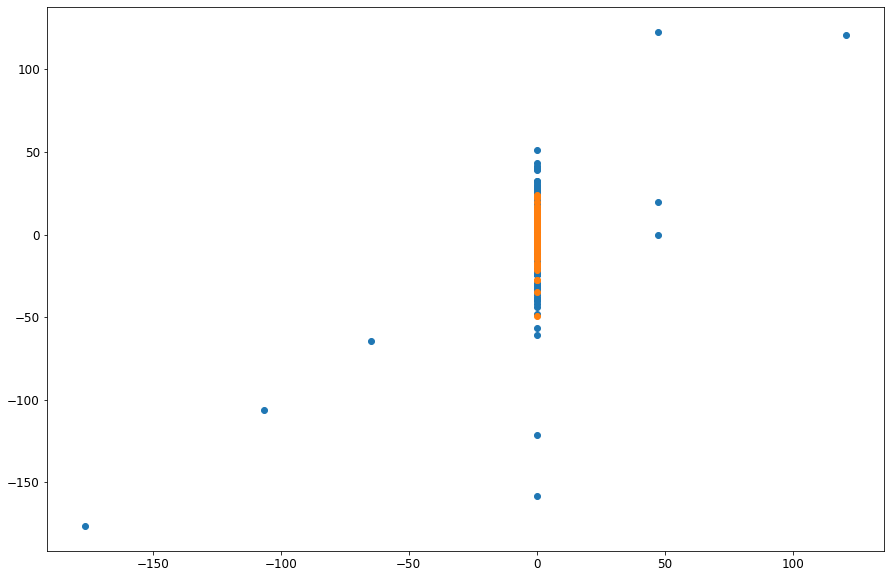

In [57]:
# Plot predicted against actual values
from matplotlib import pyplot as plt
# Use the best max_depth
decision_tree_EC = DecisionTreeRegressor(max_depth=3) # fill in best max depth here
decision_tree_EC.fit(train_feature, train_target)
# Predict values for train and test
train_prediction = decision_tree_EC.predict(train_feature)
test_prediction = decision_tree_EC.predict(test_feature)
# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train') # blue
plt.scatter(test_prediction, test_target, label='test') # orange
plt.show()

In [59]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

indicetrian_test=df1_COL.index
print(indicetrian_test.size) ###Tamaño del índice


686
686
77
77
763


In [60]:
indicetrain=indicetrian_test[0:685]
indicetest=indicetrian_test[685:762]

print(indicetrain.size)
print(indicetest.size)

targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

685
77
763
763


In [61]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

,observado,Predicción
Fecha,,
2018-02-22,7.85,-0.036775
2018-02-23,6.96,-0.036775
2018-02-26,0.40,-0.036775
2018-02-27,-7.70,-0.036775
2018-02-28,-8.37,-0.036775
2018-03-01,-38.20,-0.036775
2018-03-02,-12.05,-0.036775
2018-03-05,-9.90,-0.036775
2018-03-06,13.45,-0.036775


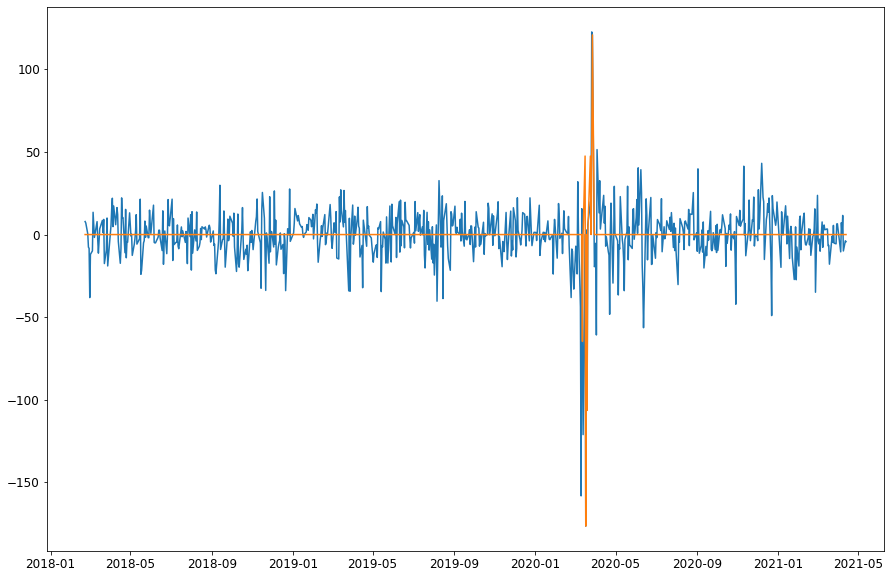

In [62]:
plt.plot(ObsvsPred)

Deshacemos la transformación

In [73]:
COLts[686]

1363.74

In [74]:
x = np.array(test_prediction)
len(x)
predictionreal = np.concatenate(([1363.74], x)).cumsum()
y = np.array(test_target)
len(y)
targetreal = np.concatenate(([1363.74], y)).cumsum()

In [76]:
d = {'observado real': targetreal, 'Predicción real': predictionreal}
ObsvsPredr=pd.DataFrame(data=d,index=indicetrian_test[684:762])
ObsvsPredr.head(10)

,observado real,Predicción real
Fecha,,
2020-12-15,1363.74,1363.740000
2020-12-16,1377.19,1363.703225
2020-12-17,1399.31,1363.666451
2020-12-18,1382.19,1363.629676
2020-12-21,1333.10,1363.592901
2020-12-22,1356.63,1363.556127
2020-12-23,1372.34,1363.519352
2020-12-24,1377.93,1363.482577
2020-12-28,1386.77,1363.445803


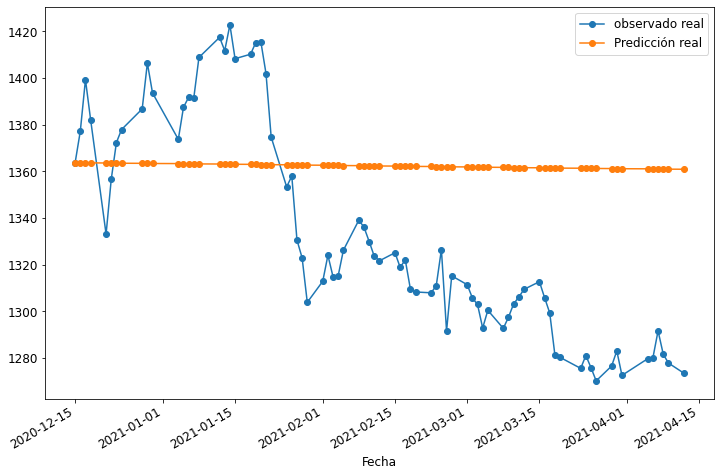

In [77]:
ax = ObsvsPredr.plot( marker="o", figsize=(12,8))

## Redes Neuronales
Usamos las mismas covariables

In [12]:
print(df1_COL.head(7))
df1_COL.shape

              t-5   t-4   t-3   t-2    t-1      t
Fecha                                            
2018-02-22  13.80 -4.42  6.35 -5.01   1.69   7.85
2018-02-23  -4.42  6.35 -5.01  1.69   7.85   6.96
2018-02-26   6.35 -5.01  1.69  7.85   6.96   0.40
2018-02-27  -5.01  1.69  7.85  6.96   0.40  -7.70
2018-02-28   1.69  7.85  6.96  0.40  -7.70  -8.37
2018-03-01   7.85  6.96  0.40 -7.70  -8.37 -38.20
2018-03-02   6.96  0.40 -7.70 -8.37 -38.20 -12.05


(763, 6)

In [13]:
# Split data
PRESsplit = df1_COL.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]

print(X1)
print(y1)

[[ 13.8   -4.42   6.35  -5.01   1.69]
 [ -4.42   6.35  -5.01   1.69   7.85]
 [  6.35  -5.01   1.69   7.85   6.96]
 ...
 [  6.49 -10.51   7.16   0.38  11.54]
 [-10.51   7.16   0.38  11.54  -9.96]
 [  7.16   0.38  11.54  -9.96  -3.82]]
[ 7.8500e+00  6.9600e+00  4.0000e-01 -7.7000e+00 -8.3700e+00 -3.8200e+01
 -1.2050e+01 -9.9000e+00  1.3450e+01  5.7000e+00 -1.7700e+00  5.5000e-01
  7.7900e+00 -3.2200e+00 -1.1280e+01 -3.8200e+00  3.4400e+00  8.5300e+00
  1.1400e+00  9.1400e+00 -1.7590e+01 -9.3800e+00  9.9800e+00 -1.9040e+01
  5.5200e+00  1.5360e+01  2.1960e+01  4.7500e+00  1.7250e+01  5.9200e+00
  1.0960e+01  1.6290e+01  1.2070e+01 -4.2100e+00 -1.7430e+01 -8.4400e+00
  2.2160e+01  1.0000e+01  1.0290e+01 -1.1000e+01  1.5200e+01 -1.4100e+01
 -4.5000e+00 -4.7100e+00  1.3110e+01 -8.9000e-01  1.1000e-01 -1.2640e+01
 -5.9900e+00 -2.7800e+00  2.1900e+00  1.2010e+01 -5.8200e+00 -2.5600e+00
  2.1390e+01 -2.4100e+01 -2.1830e+01 -5.0200e+00 -3.8100e+00  8.1300e+00
 -1.6700e+00  5.1500e+00 -1.9600e+00

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_val, y_train, y_val=train_test_split(X1,y1,test_size=0.1, train_size=0.9, shuffle=False)

print(X_train.shape) #80% DEL 90%
print(X_val.shape) #20 DEL 90%
print(y_train.shape)
print(y_val.shape)

(686, 5)
(77, 5)
(686,)
(77,)


In [15]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_train

array([[0.6361722 , 0.57527241, 0.61127081, 0.57330035, 0.5956949 ],
       [0.57527241, 0.61127081, 0.57330035, 0.5956949 , 0.61628451],
       [0.61127081, 0.57330035, 0.5956949 , 0.61628451, 0.61330971],
       ...,
       [0.62226753, 0.73410656, 0.66528511, 0.65639414, 0.53957484],
       [0.73410656, 0.66528511, 0.65639414, 0.53957484, 0.62073   ],
       [0.66528511, 0.65639414, 0.53957484, 0.62073   , 0.62895247]])

In [16]:
import tensorflow.keras as keras

model=keras.models.Sequential([keras.layers.Dense(32,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
#primera capa oculta con 32 unidades, fun. relu y dimensión de entrada    
#capa de salida con una de salida
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
22/22 [==============================] - 1s 9ms/step - loss: 285.1102 - val_loss: 168.9214
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 243.1488 - val_loss: 168.7621
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 409.5331 - val_loss: 171.9636
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 446.5686 - val_loss: 170.8011
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 387.6656 - val_loss: 170.3968
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 281.2696 - val_loss: 170.8766
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 363.0069 - val_loss: 171.3028
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 406.6677 - val_loss: 169.6797
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 347.9196 - val_loss: 170.4480
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 307.9031 

<AxesSubplot:>

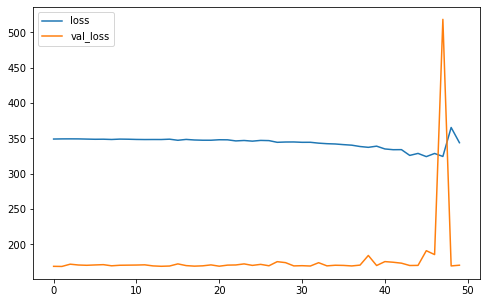

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [21]:
mse_test=model.evaluate(X_val,y_val)
print(mse_test)

3/3 [==============================] - 0s 999us/step - loss: 170.5028
170.50283813476562


In [23]:
ypred=model.predict(X_val)
print(ypred)

[[ 0.93594885]
 [ 0.50786304]
 [ 0.6682427 ]
 [-0.30078268]
 [-1.9356129 ]
 [-1.7811319 ]
 [ 0.28219724]
 [ 1.5454917 ]
 [-0.23247576]
 [ 0.2292993 ]
 [-0.06144738]
 [-1.0419328 ]
 [-1.0864398 ]
 [ 0.16340113]
 [ 0.37569427]
 [-0.11010098]
 [ 0.30940008]
 [ 0.04374552]
 [-0.401366  ]
 [-0.6050365 ]
 [-0.3707149 ]
 [-0.5676136 ]
 [ 0.16469622]
 [-0.62532854]
 [-1.4544668 ]
 [-1.819161  ]
 [-0.90367675]
 [-0.66332674]
 [-0.79172516]
 [-1.5732377 ]
 [-0.16167855]
 [ 0.06009579]
 [ 0.257411  ]
 [-0.5857773 ]
 [-0.3603201 ]
 [ 0.517859  ]
 [ 0.09762716]
 [-0.57202864]
 [-0.9212419 ]
 [-0.53939414]
 [-0.24729228]
 [-0.2795725 ]
 [-0.3199153 ]
 [-0.7020159 ]
 [-0.5062301 ]
 [-0.59862924]
 [-0.00461245]
 [ 0.16728282]
 [-0.7212093 ]
 [-0.49412608]
 [-0.58893585]
 [ 0.49738216]
 [-1.1381216 ]
 [-0.6175227 ]
 [-0.32379293]
 [-0.39467955]
 [-0.09249926]
 [-0.30824804]
 [ 0.15131927]
 [-0.1660459 ]
 [-0.19988632]
 [-0.3928597 ]
 [-0.6743438 ]
 [-1.100503  ]
 [-0.77824223]
 [-0.5940931 ]
 [ 0.03425

Text(0.5, 0, 'Index')

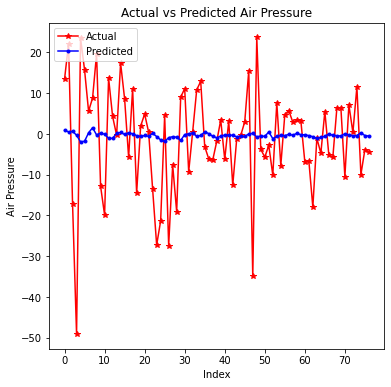

In [24]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_val.size), y_val, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

# Punto 5
Obtenga el error cuadr´atico medio de predicci´on basado en los modelos ajustados del punto anterior y el conjunto de validaci´on. Cu´al modelo 1 escoger´ıa basado en ´este criterio ´unicamente?Tenga en cuenta que debe reportar el error cuadr´atico medio en la escala original de los datos.(2 puntos)

In [81]:
#ARBOLES DE DECISION
import statistics as stats
stats.mean((ObsvsPredr["observado real"] - ObsvsPredr["Predicción real"])**2)

2878.5938995856645

In [68]:
#SUAVIZAMIENTO
stats.mean((fit1.resid)**2)

352.67645722349533

In [25]:
#REDES
print(mse_test)

170.50283813476562


# Punto 6
Obtenga los residuales del modelo ˆet = yt − yˆt, y haga un chequeo de su gr´afica, y de la funci´on de autocorrelaci´on de los residuales. Qu´e puede usted decir al respecto para cada modelo?(2 puntos)
## Arboles

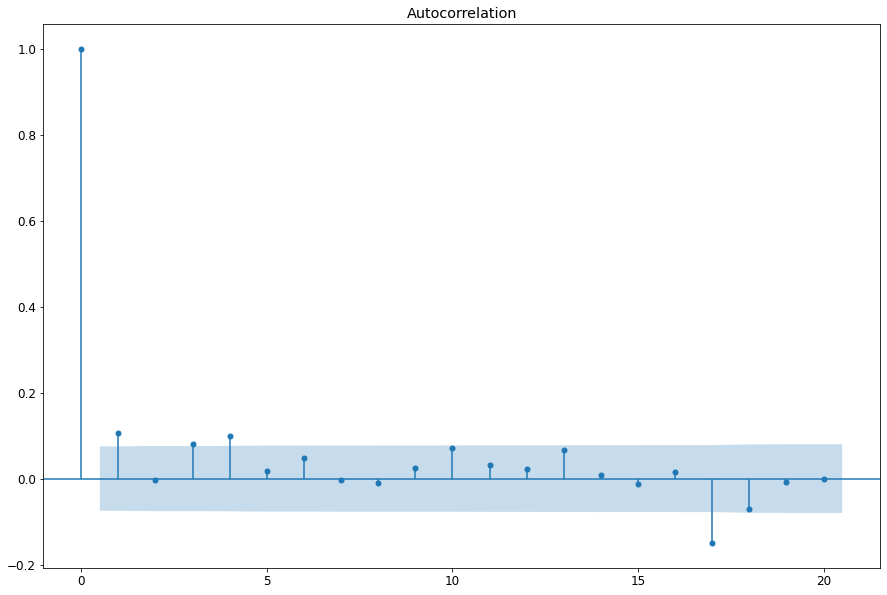

In [69]:
residuals = train_target - train_prediction
acfres=plot_acf(residuals, adjusted=False, lags=20)

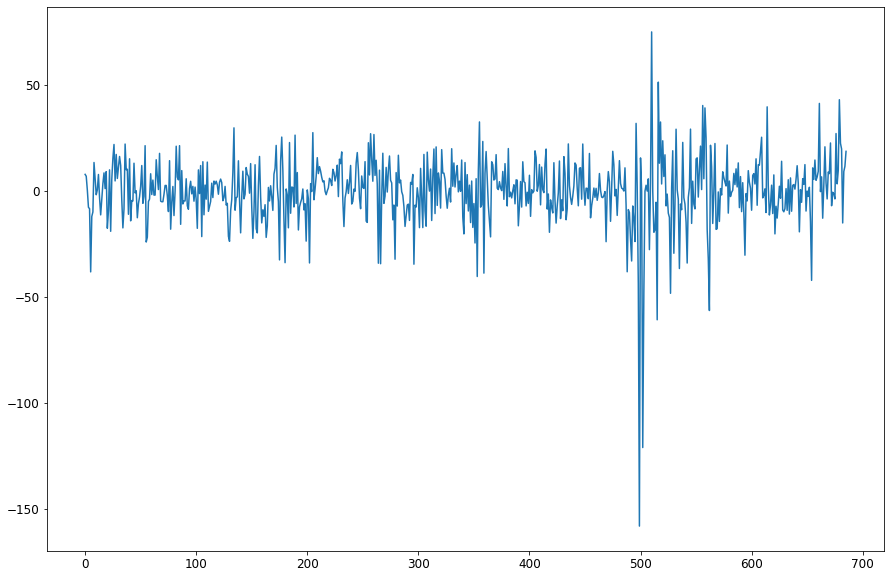

In [70]:
plt.plot(residuals)

## Suavizamiento

Text(0, 0.5, 'resid')

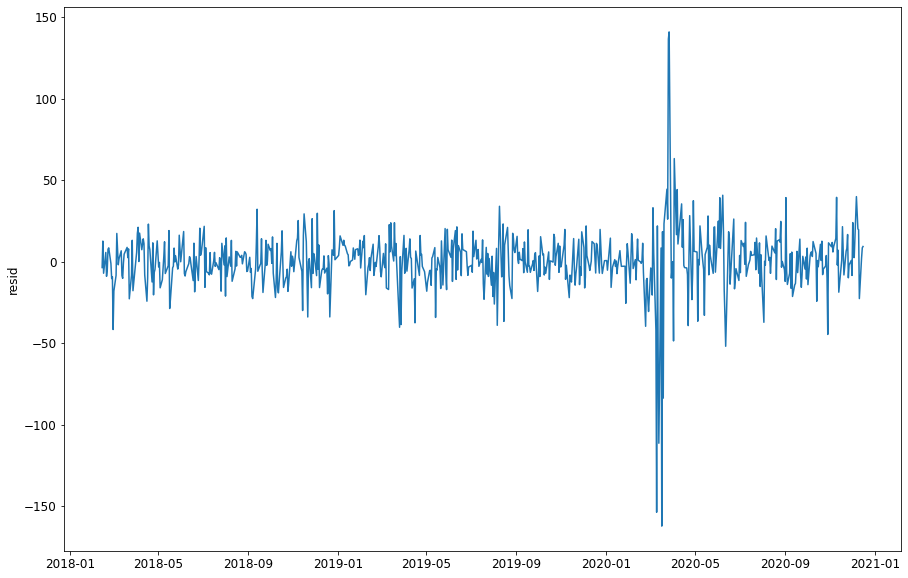

In [71]:
plt.plot(fit1.resid)
plt.ylabel('resid')

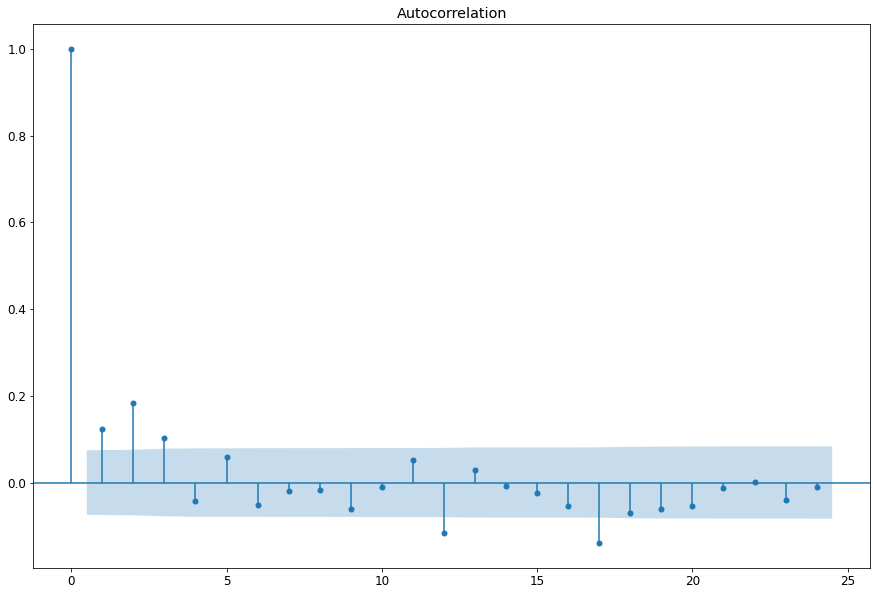

In [72]:
a = plot_acf(fit1.resid, adjusted = False, lags=24)

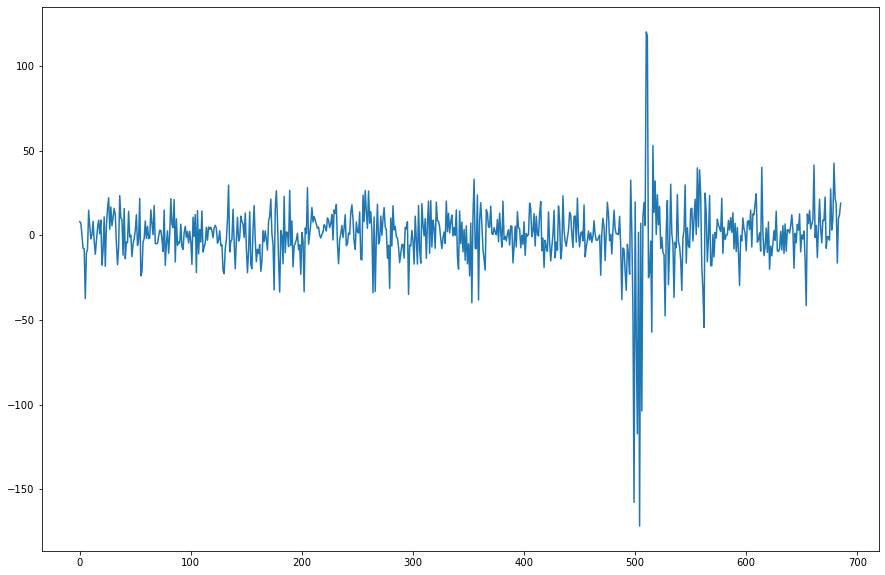

In [26]:
xpred = model.predict(X_train)
datasetpred = pd.DataFrame({'Column1': xpred[:, 0]}) #ESTO PARA TRATAR EL ARREGLO N-DIMENSIONAL
ered = y_train - datasetpred['Column1']
plt.plot(ered)

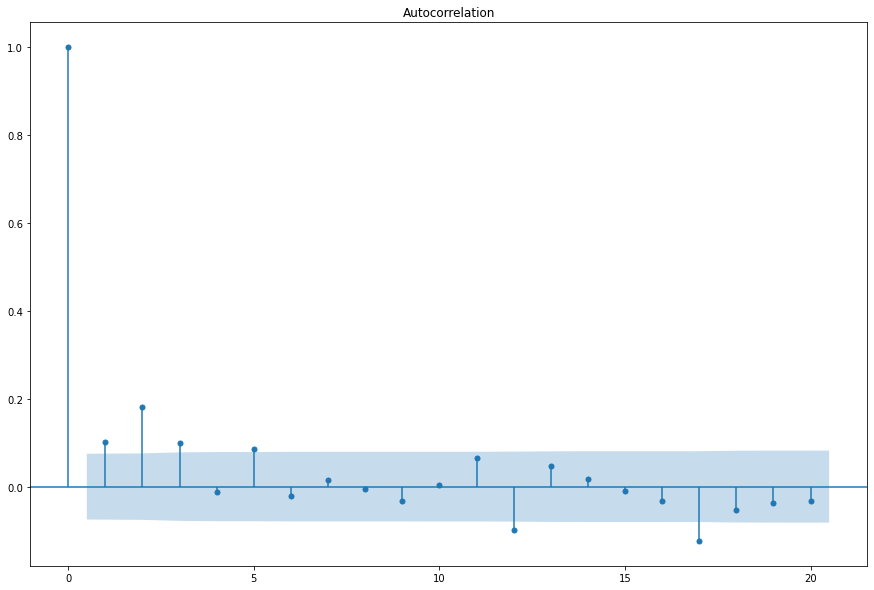

In [27]:
acfres=plot_acf(ered, adjusted=False, lags=20)